In [2]:
import collections
import random
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [3]:
class Mastermind(object):
    """Run a single game of Mastermind."""
    def __init__(self, code, num_colors):
        self.code = code
        # The number of colors must be stored in addition to the code, since 
        # this value cannot always be determined from the code itself.
        self.num_colors = num_colors
        self.guess_list = []
        self.feedback_list = []
        self.won = False
    
    @classmethod
    def random(cls, num_pegs, num_colors):
        """Create a new game of Mastermind with a randomly generated code."""
        # Generate the code.
        code = tuple(
                random.randrange(0, num_colors) for peg in range(num_pegs))
        
        # Create the game.
        return cls(code, num_colors)
    
    @classmethod
    def classic(cls):
        """Create a new game with the classic number of pegs (4) and colors 
        (6)."""
        return cls.random(4, 6)
    
    def guess(self, guess):
        """Guess the secret code."""
        
        # If the game has been won, return the previous feedback. Do not 
        # update the game state.
        if self.won:
            return self.feedback_list[-1]
        
        # Get feedback for the new guess and update the game state.
        feedback = get_feedback(guess, self.code)
        self.guess_list.append(guess)
        self.feedback_list.append(feedback)
        
        # Check if the correct code was guessesd.
        if feedback[0] == len(self.code):
            self.won = True
        
        return feedback
    
    def num_guesses(self):
        """Return the number of guesses made during the current game."""
        return len(self.guess_list)
    
    def print_gamestate(self):
        print('Secret code:', self.code)
        print('Number of colors:', self.num_colors)
        print('Guess list:', self.guess_list)
        print('Feedback list:', self.feedback_list)
        print('Game over?:', self.won)


def get_feedback(guess, code):
    """The inputs must be integer tuples of the same length."""
    
    num_correct_pegs = 0
    num_correct_color = 0
    
    # Define counters to store the number of pegs of each color that are 
    # not in matching positions. Create a counter for both the guess and 
    # the code.
    incorrect_pegs_guess = collections.Counter()
    incorrect_pegs_code = collections.Counter()
    
    # Iterate through each pair of pegs in the guess and code.
    for guess_peg, code_peg in zip(guess, code):
    
        # If the pegs match, increment the number of correct pegs. Otherwise, 
        # track the number of pegs of each color that don't match.
        if guess_peg == code_peg:
            num_correct_pegs += 1
        else:
            incorrect_pegs_guess[guess_peg] += 1
            incorrect_pegs_code[code_peg] += 1
    
    # Now calculate the number of pegs that are the correct color but in the 
    # wrong position.
    for peg_color, num_guess in incorrect_pegs_guess.items():
        
        # Get the number of the current color in the code.
        num_code = incorrect_pegs_code[peg_color]
        
        # Increment the number of correct color with the minimum of the two 
        # numbers.
        num_correct_color += min(num_guess, num_code)        
    
    return num_correct_pegs, num_correct_color

In [4]:
def Initialize_state_action():
    return -random.random()

In [5]:
def Binary_to_Decimal(n): 
    return int(n,2)

In [6]:
def base10toN(num, base):
    """Change ``num'' to given base
    Upto base 36 is supported."""

    converted_string, modstring = "", ""
    currentnum = num
    if not 1 < base < 37:
        raise ValueError("base must be between 2 and 36")
    if not num:
        return '0'
    while currentnum:
        mod = currentnum % base
        currentnum = currentnum // base
        converted_string = chr(48 + mod + 7*(mod > 10)) + converted_string
    return converted_string

In [7]:
def Action_decimal_to_tuple(action_decimal, num_colors, num_pegs):
    action_actual = base10toN(action_decimal, num_colors)
    
    if len(action_actual) < num_pegs:
        diff = num_pegs - len(action_actual)
        b = action_actual
        c = ""
        for j in range(0,diff):
            c += '0'
        #j = j+ 1
        for k in range(0,len(action_actual)):
            c += action_actual[k]
        action_actual = c
        
    tuple_action = tuple(list(action_actual))
    L = list(tuple_action)
    for y in range(0, len(L)):
        L[y] = int(L[y])
    tuple_actual_action = tuple(i for i in L)
    return(tuple_actual_action)

In [8]:
def Initialize_qvalues_for_state(State):
    State_dict = {}
    for i in range(0, num_possible_codes):
        #key = tuple((State, i))
        key = i
        value = Initialize_state_action()
        State_dict[key] = value
    #print("State_dict=", State_dict)
    return State_dict

In [9]:
def Select_Action(State, epsilon, Actions_already_taken, Q_values):
    dict1 = Q_values[State].copy()

    for action in Actions_already_taken:
        del dict1[action]

    #print("dict1",dict1)
    #print("Q_values[State]",Q_values[State])

    val = random.random()
    #print(val)

    if val <= epsilon:
        #print("random_action")
        #a = random.randint(0,len(dict1)-1)
        a = random.choice(list(dict1))
    else:
        a = max(dict1.keys(), key=(lambda x: dict1[x]))

    return a

In [10]:
def Compute_Next_State(Guess_Code, feedback, Possible_Code, num_colors, num_pegs):
    for i in range(0, len(Possible_Code)):
        if Possible_Code[i] == 1:
            action_to_check = Action_decimal_to_tuple(i, num_colors, num_pegs)
            feedback_to_check = get_feedback(action_to_check, Guess_Code)
            #print(feedback_to_check)
            if feedback_to_check != feedback:
                Possible_Code[i] = 0

    ###print("NextStateBinary:",Possible_Code)
    Next_State_binary_str = ("".join(map(str, Possible_Code)))
    #print(Next_State_binary_str)
    Next_State = Binary_to_Decimal(Next_State_binary_str)
    ##print("Next State decimal:",Next_State)
    return Possible_Code , Next_State #, Possible_Code

In [11]:
def Update_Q_value(S, action_decimal, Next_State, Reward, discount_factor, learning_rate, Q_values):
    Q_S_a = Q_values[S][action_decimal]
    Q_Next_State_highestaction = max(Q_values[Next_State].values())
    Updated_Q_S_a = Q_S_a + learning_rate * (Reward + discount_factor * Q_Next_State_highestaction - Q_S_a)
    Q_values[S][action_decimal] = Updated_Q_S_a

In [12]:
def Evaluate_QLearning(learning_rate, epsilon, discount_factor, episodes, num_pegs, num_colors, Result_df):

# initialize for all possible state action pairs except terminal
# initialize for terminal state
    Q_values = {}
    terminal_decimal = 0
    terminal_dict = {}
    for i in range(0, num_possible_codes):
        #key = tuple((terminal_decimal, i))
        key = i
        value = 0
        terminal_dict[key] = value
    Q_values[terminal_decimal] = terminal_dict
    
    Visited_States = []
    
    for episode in range(1, episodes+1):
        game = Mastermind.random(num_pegs, num_colors)
        Secret_Code = game.code
        
        S = 2 ** num_possible_codes - 1
        
        if S not in Visited_States:
            State_dict = Initialize_qvalues_for_state(S)
            Q_values[S] = State_dict
            Visited_States.append(S)
        
        Actions_Taken_boolean = [0] * num_possible_codes
        Actions_already_taken = []
        Possible_Code = [1] * num_possible_codes
        result = 0
        count = 0
        
        #while S ! = 0: # or result == 0  # while condition1==False and condition2==False and val==-1:
        while result == 0:
            ##print("In while loop")
            action_decimal = Select_Action(S, epsilon, Actions_already_taken, Q_values)
            Actions_already_taken.append(action_decimal)
            Actions_Taken_boolean[action_decimal] = 1
            Guess_Code = Action_decimal_to_tuple(action_decimal, num_colors, num_pegs)
            feedback = game.guess(Guess_Code)
            result = game.won

            if result == 0:
                Possible_Code[action_decimal] = 0

            ##print("feedback =",feedback)
            ##print("Actions_already_taken",Actions_already_taken)
            ##print("Actions_Taken_boolean",Actions_Taken_boolean)
            ##print("Possible Code",Possible_Code)

            Possible_Code, Next_State, = Compute_Next_State(Guess_Code, feedback, Possible_Code, num_colors, num_pegs)
            if Next_State not in Visited_States:
                State_dict = Initialize_qvalues_for_state(Next_State)
                Q_values[Next_State] = State_dict
                Visited_States.append(Next_State)

            ##print("Visited_States",Visited_States)
            ##print("Q_values",Q_values)

            if result == 0:
                Reward = -1
            else:
                Reward = 1

            Update_Q_value(S, action_decimal, Next_State, Reward, discount_factor, learning_rate, Q_values)

            count = len(Actions_already_taken)
            S = Next_State
            
        if episode == 1 or episode % 500 == 0:
            print("episode =", episode, "and", "count=", count)
        if episode == 1 or episode % 5 == 0:
            Result_df = Result_df.append({'Episode' : episode , 'Count' : count} , ignore_index=True)            
            
    return Result_df

In [13]:
num_pegs = 4
num_colors = 4
num_possible_codes = num_colors ** num_pegs

In [20]:
No_of_experiments = 30
Result_df = pd.DataFrame(columns=['Episode', 'Count'])
for experiment in range(0, No_of_experiments):
    print("Experiment No:", experiment+1)
    Result_df = Evaluate_QLearning(0.1, 0.05, 0.9, 3000, num_pegs, num_colors, Result_df)

Experiment No: 1
episode = 1 and count= 142
episode = 500 and count= 4
episode = 1000 and count= 6
episode = 1500 and count= 5
episode = 2000 and count= 4
episode = 2500 and count= 4
episode = 3000 and count= 8
Experiment No: 2
episode = 1 and count= 232
episode = 500 and count= 212
episode = 1000 and count= 4
episode = 1500 and count= 5
episode = 2000 and count= 3
episode = 2500 and count= 6
episode = 3000 and count= 7
Experiment No: 3
episode = 1 and count= 253
episode = 500 and count= 14
episode = 1000 and count= 6
episode = 1500 and count= 74
episode = 2000 and count= 4
episode = 2500 and count= 5
episode = 3000 and count= 4
Experiment No: 4
episode = 1 and count= 177
episode = 500 and count= 99
episode = 1000 and count= 7
episode = 1500 and count= 5
episode = 2000 and count= 8
episode = 2500 and count= 4
episode = 3000 and count= 4
Experiment No: 5
episode = 1 and count= 111
episode = 500 and count= 183
episode = 1000 and count= 5
episode = 1500 and count= 4
episode = 2000 and cou

# Random Agent

In [16]:
num_pegs = 4
num_colors = 4
num_possible_codes = num_colors ** num_pegs

experiments = 30

Total_Sum_Actions = 0
print("For Random agent with ", num_pegs, "pegs & ", num_colors, "colors")
for i in range(0, experiments):

    secret_code = random.randint(1,num_possible_codes)
    actions = []

    guess_code = random.randint(1,num_possible_codes)
    actions.append(guess_code)
    while guess_code != secret_code:
        guess_code = random.randint(1,num_possible_codes)
        if guess_code not in actions:
            actions.append(guess_code)
        
    Total_Sum_Actions = Total_Sum_Actions + len(actions)
    print("for experiment", i, ": No of actions =", len(actions))
    #print(actions)
    
print("Total_Sum_Actions",Total_Sum_Actions)
Mean = Total_Sum_Actions/experiments
print("Mean",Mean)

For Random agent with  4 pegs &  4 colors
for experiment 0 : No of actions = 138
for experiment 1 : No of actions = 214
for experiment 2 : No of actions = 215
for experiment 3 : No of actions = 153
for experiment 4 : No of actions = 232
for experiment 5 : No of actions = 12
for experiment 6 : No of actions = 1
for experiment 7 : No of actions = 197
for experiment 8 : No of actions = 240
for experiment 9 : No of actions = 169
for experiment 10 : No of actions = 52
for experiment 11 : No of actions = 121
for experiment 12 : No of actions = 97
for experiment 13 : No of actions = 116
for experiment 14 : No of actions = 19
for experiment 15 : No of actions = 15
for experiment 16 : No of actions = 31
for experiment 17 : No of actions = 38
for experiment 18 : No of actions = 150
for experiment 19 : No of actions = 27
for experiment 20 : No of actions = 157
for experiment 21 : No of actions = 101
for experiment 22 : No of actions = 41
for experiment 23 : No of actions = 35
for experiment 24 : 

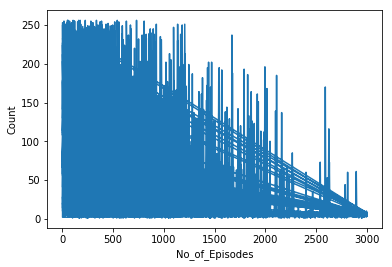

In [21]:
plt.plot(Result_df['Episode'], Result_df['Count'])
plt.xlabel('No_of_Episodes')
plt.ylabel('Count')
plt.show()

In [22]:
Final_df = Result_df.groupby('Episode').mean().reset_index()

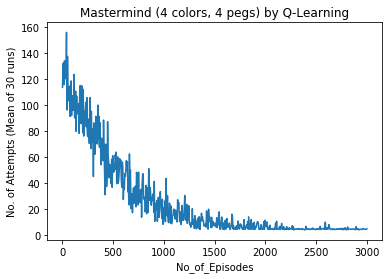

In [23]:
plt.plot(Final_df['Episode'], Final_df['Count'])
plt.xlabel('No_of_Episodes')
plt.ylabel('No. of Attempts (Mean of 30 runs)')
plt.title('Mastermind (4 colors, 4 pegs) by Q-Learning')
plt.savefig('test.png')
plt.show()

In [24]:
Result_df.to_csv(r'Results_All_exp.csv')

In [25]:
Final_df.to_csv(r'Results_Mean.csv')

# (3,3)

In [18]:
Final_df = pd.read_csv('C:/Users/Sai Teja/Desktop/ML_RL/Results/3,3/2/Results_Mean.csv', delimiter = ',')

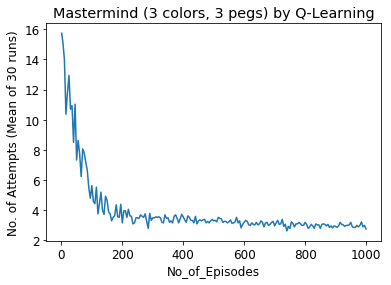

In [19]:
plt.plot(Final_df['Episode'], Final_df['Q-learning'])
plt.xlabel('No_of_Episodes')
plt.ylabel('No. of Attempts (Mean of 30 runs)')
plt.title('Mastermind (3 colors, 3 pegs) by Q-Learning')
plt.savefig('3_3_Ql.png')
plt.show()

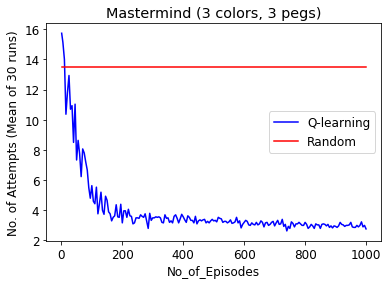

In [20]:
plt.plot(Final_df['Episode'], Final_df['Q-learning'], color = 'blue')
plt.plot(Final_df['Episode'], Final_df['Random'], color = 'red')

plt.xlabel('No_of_Episodes')
plt.ylabel('No. of Attempts (Mean of 30 runs)')
plt.title('Mastermind (3 colors, 3 pegs)')
plt.legend()
plt.savefig('3_3_Ql_Rn.png')
plt.show()

# (4,4)

In [15]:
Final_df = pd.read_csv('C:/Users/Sai Teja/Desktop/ML_RL/Results/4,4/3000 epochs/Results_Mean.csv', delimiter = ',')

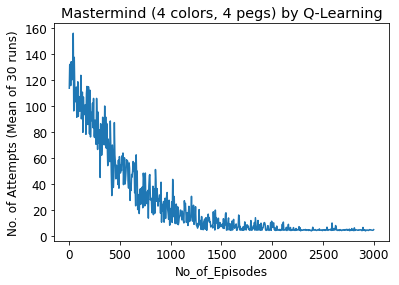

In [16]:
plt.plot(Final_df['Episode'], Final_df['Q-learning'])
plt.xlabel('No_of_Episodes')
plt.ylabel('No. of Attempts (Mean of 30 runs)')
plt.title('Mastermind (4 colors, 4 pegs) by Q-Learning')
plt.savefig('4_4_Ql.png')
plt.show()

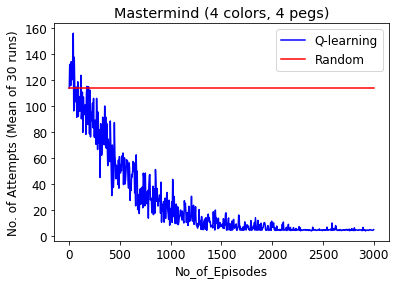

In [17]:
plt.plot(Final_df['Episode'], Final_df['Q-learning'], color = 'blue')
plt.plot(Final_df['Episode'], Final_df['Random'], color = 'red')

plt.xlabel('No_of_Episodes')
plt.ylabel('No. of Attempts (Mean of 30 runs)')
plt.title('Mastermind (4 colors, 4 pegs)')
plt.legend()
plt.savefig('4_4_Ql_Rn.png')
plt.show()

# (6,4)

In [8]:
Final_df = pd.read_csv('C:/Users/Sai Teja/Desktop/ML_RL/Results/6,4/SuperComputer/Results_Mean.csv', delimiter = ',')

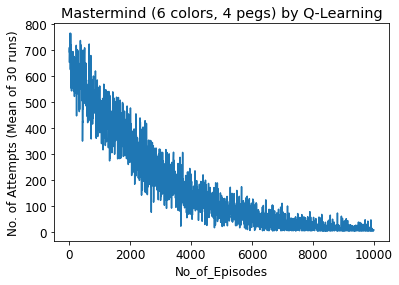

In [11]:
plt.plot(Final_df['Episode'], Final_df['Q-learning'])
plt.xlabel('No_of_Episodes')
plt.ylabel('No. of Attempts (Mean of 30 runs)')
plt.title('Mastermind (6 colors, 4 pegs) by Q-Learning')
plt.savefig('6_4_Ql.png')
plt.show()

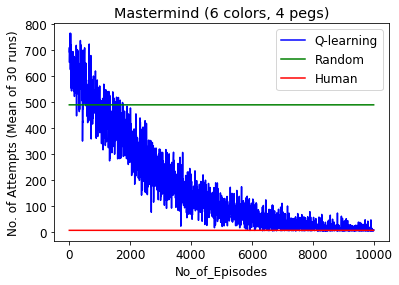

In [12]:
plt.plot(Final_df['Episode'], Final_df['Q-learning'], color = 'blue')
plt.plot(Final_df['Episode'], Final_df['Random'], color = 'green')
plt.plot(Final_df['Episode'], Final_df['Human'], color = 'red')

plt.xlabel('No_of_Episodes')
plt.ylabel('No. of Attempts (Mean of 30 runs)')
plt.title('Mastermind (6 colors, 4 pegs)')
plt.legend()
plt.savefig('6_4_Ql_Rn_Hu.png')
plt.show()

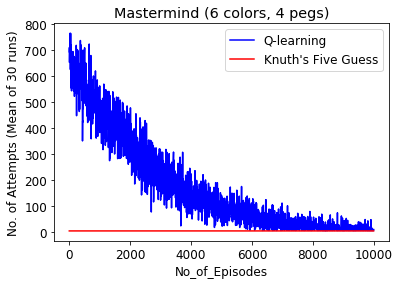

In [13]:
plt.plot(Final_df['Episode'], Final_df['Q-learning'], color = 'blue')
plt.plot(Final_df['Episode'], Final_df["Knuth's Five Guess"], color = 'red')

plt.xlabel('No_of_Episodes')
plt.ylabel('No. of Attempts (Mean of 30 runs)')
plt.title('Mastermind (6 colors, 4 pegs)')
plt.legend()
plt.savefig('6_4_Ql_knuth.png')
plt.show()

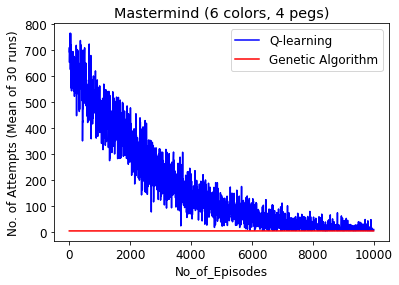

In [14]:
plt.plot(Final_df['Episode'], Final_df['Q-learning'], color = 'blue')
plt.plot(Final_df['Episode'], Final_df["Genetic Algorithm"], color = 'red')

plt.xlabel('No_of_Episodes')
plt.ylabel('No. of Attempts (Mean of 30 runs)')
plt.title('Mastermind (6 colors, 4 pegs)')
plt.legend()
plt.savefig('6_4_Ql_GA.png')
plt.show()